In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import gmaps

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key
from config import gkey

In [2]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(low=-90,high=90,size=1500)
lngs=np.random.uniform(low=-180,high=180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)
#coordinates

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
#    print(coordinate[0], coordinate[1])

In [5]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities=[]

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

632

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 73.62,
  'feels_like': 67.87,
  'temp_min': 69.8,
  'temp_max': 77,
  'pressure': 1014,
  'humidity': 47},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 220},
 'clouds': {'all': 75},
 'dt': 1593140550,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1593076124,
  'sunset': 1593131105},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [10]:
# Get the JSON data.
boston_data=city_weather.json()

In [11]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1593076124,
 'sunset': 1593131105}

In [12]:
boston_data["sys"]["country"]

'US'

In [13]:
lat=boston_data["coord"]["lat"]
lng=boston_data["coord"]["lon"]
max_temp=boston_data["main"]["temp_max"]
humidity=boston_data["main"]["humidity"]
clouds=boston_data["clouds"]["all"]
wind=boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 77 47 75 11.41


In [14]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 26, 3, 2, 30)

In [15]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-06-26 03:02:30'

In [16]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50==0 and i>=50):
        set_count+=1
        record_count=1
        
    # Create emdpoint URL with each city.
    city_url=url+"&q="+city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print(f"City '{city}' not found. Skipping...")
        pass
        #raise

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | provideniya
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | hambantota
Processing Record 7 of Set 1 | taolanaro
City 'taolanaro' not found. Skipping...
Processing Record 8 of Set 1 | khatanga
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | medea
Processing Record 11 of Set 1 | umm lajj
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | pelym
Processing Record 16 of Set 1 | lolua
City 'lolua' not found. Skipping...
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | kloulklubed
Processing Record 19 of Set 1 | klaksvik
Processing Record 20 of Set 1 | san ramon de la nueva oran
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | santa barbara
Proces

City 'mahaicony' not found. Skipping...
Processing Record 35 of Set 4 | coahuayana
Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | biskamzha
Processing Record 38 of Set 4 | poum
Processing Record 39 of Set 4 | plouzane
Processing Record 40 of Set 4 | pundaguitan
Processing Record 41 of Set 4 | moussoro
Processing Record 42 of Set 4 | muzhi
Processing Record 43 of Set 4 | byron bay
Processing Record 44 of Set 4 | trairi
Processing Record 45 of Set 4 | boulder
Processing Record 46 of Set 4 | tabuk
Processing Record 47 of Set 4 | champerico
Processing Record 48 of Set 4 | umm kaddadah
Processing Record 49 of Set 4 | illoqqortoormiut
City 'illoqqortoormiut' not found. Skipping...
Processing Record 50 of Set 4 | warrnambool
Processing Record 1 of Set 5 | santa isabel do rio negro
Processing Record 2 of Set 5 | catarman
Processing Record 3 of Set 5 | grand river south east
City 'grand river south east' not found. Skipping...
Processing Record 4 of Set 5 | brae
Proce

Processing Record 18 of Set 8 | zehdenick
Processing Record 19 of Set 8 | rantepao
Processing Record 20 of Set 8 | matara
Processing Record 21 of Set 8 | kenai
Processing Record 22 of Set 8 | strelka
Processing Record 23 of Set 8 | laguna
Processing Record 24 of Set 8 | borujerd
Processing Record 25 of Set 8 | suntar
Processing Record 26 of Set 8 | sao raimundo nonato
Processing Record 27 of Set 8 | adrar
Processing Record 28 of Set 8 | vostok
Processing Record 29 of Set 8 | luderitz
Processing Record 30 of Set 8 | padang
Processing Record 31 of Set 8 | khorramshahr
Processing Record 32 of Set 8 | kalomo
City 'kalomo' not found. Skipping...
Processing Record 33 of Set 8 | buraydah
Processing Record 34 of Set 8 | sawakin
Processing Record 35 of Set 8 | cochrane
Processing Record 36 of Set 8 | san luis
Processing Record 37 of Set 8 | haverfordwest
Processing Record 38 of Set 8 | kovdor
Processing Record 39 of Set 8 | labuhan
Processing Record 40 of Set 8 | xuddur
Processing Record 41 of 

Processing Record 8 of Set 12 | menongue
Processing Record 9 of Set 12 | bac lieu
Processing Record 10 of Set 12 | slobodskoy
Processing Record 11 of Set 12 | guliston
Processing Record 12 of Set 12 | one hundred mile house
City 'one hundred mile house' not found. Skipping...
Processing Record 13 of Set 12 | tokoroa
Processing Record 14 of Set 12 | marsabit
Processing Record 15 of Set 12 | nuevo casas grandes
Processing Record 16 of Set 12 | havelock
Processing Record 17 of Set 12 | catuday
Processing Record 18 of Set 12 | arua
Processing Record 19 of Set 12 | kropotkin
Processing Record 20 of Set 12 | araouane
Processing Record 21 of Set 12 | puerto baquerizo moreno
Processing Record 22 of Set 12 | leshukonskoye
Processing Record 23 of Set 12 | ixtapa
Processing Record 24 of Set 12 | abu samrah
Processing Record 25 of Set 12 | thinadhoo
Processing Record 26 of Set 12 | cockburn town
Processing Record 27 of Set 12 | richards bay
Processing Record 28 of Set 12 | isangel
Processing Recor

In [18]:
len(city_data)

579

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.38,-173.30,46.40,65,40,17.90,RU,2020-06-26 03:03:24
1,Kodiak,57.79,-152.41,51.80,81,90,12.75,US,2020-06-26 03:03:24
2,Chokurdakh,70.63,147.92,59.85,37,34,12.91,RU,2020-06-26 03:03:24
3,Rikitea,-23.12,-134.97,75.47,85,29,24.70,PF,2020-06-26 03:03:24
4,Tiksi,71.69,128.87,49.06,79,84,4.90,RU,2020-06-26 03:03:24
5,Hambantota,6.12,81.12,78.80,94,75,10.29,LK,2020-06-26 03:03:24
6,Khatanga,71.97,102.50,74.39,48,53,12.82,RU,2020-06-26 03:03:24
7,Arraial Do Cabo,-22.97,-42.03,71.89,80,49,15.52,BR,2020-06-26 03:03:24
8,Medea,36.26,2.75,73.40,83,75,8.05,DZ,2020-06-26 03:03:24
9,Umm Lajj,25.02,37.27,79.48,73,0,8.77,SA,2020-06-26 03:01:06


In [20]:
new_column_order=["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [21]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Provideniya,RU,2020-06-26 03:03:24,64.38,-173.30,46.40,65,40,17.90
1,Kodiak,US,2020-06-26 03:03:24,57.79,-152.41,51.80,81,90,12.75
2,Chokurdakh,RU,2020-06-26 03:03:24,70.63,147.92,59.85,37,34,12.91
3,Rikitea,PF,2020-06-26 03:03:24,-23.12,-134.97,75.47,85,29,24.70
4,Tiksi,RU,2020-06-26 03:03:24,71.69,128.87,49.06,79,84,4.90
5,Hambantota,LK,2020-06-26 03:03:24,6.12,81.12,78.80,94,75,10.29
6,Khatanga,RU,2020-06-26 03:03:24,71.97,102.50,74.39,48,53,12.82
7,Arraial Do Cabo,BR,2020-06-26 03:03:24,-22.97,-42.03,71.89,80,49,15.52
8,Medea,DZ,2020-06-26 03:03:24,36.26,2.75,73.40,83,75,8.05
9,Umm Lajj,SA,2020-06-26 03:01:06,25.02,37.27,79.48,73,0,8.77


In [22]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [23]:
# Extract relevant fields from the DataFrame for plotting.
lats=city_data_df["Lat"]
max_temps=city_data_df["Max Temp"]
humidity=city_data_df["Humidity"]
cloudiness=city_data_df["Cloudiness"]
wind_speed=city_data_df["Wind Speed"]


In [24]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593140645.672203

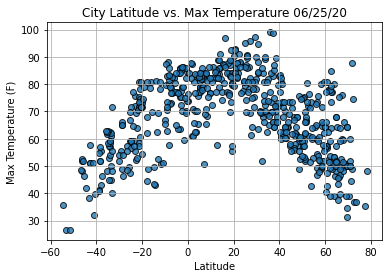

In [25]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

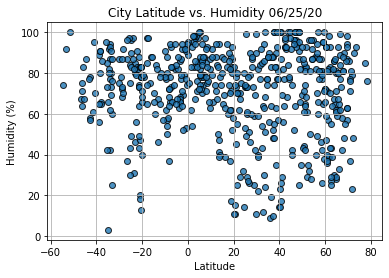

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

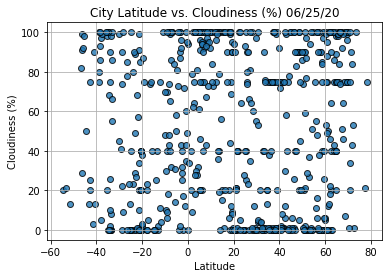

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

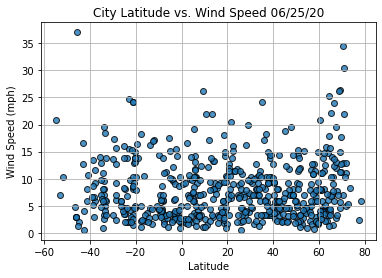

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Calculate the regression line "y values" from the slope and intercept.
(slope,intercept,r_value,p_value,std_err)=linregress(lats, max_temps)
regress_values = [(lat * slope + intercept) for lat in lats]


In [30]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The R-value is: {r_value:.3f}")

In [31]:
index13=city_data_df.loc[13]
index13

City                        Pelym
Country                        RU
Date          2020-06-26 03:03:25
Lat                         61.01
Lng                            62
Max Temp                    52.14
Humidity                       57
Cloudiness                     12
Wind Speed                   11.1
Name: 13, dtype: object

In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

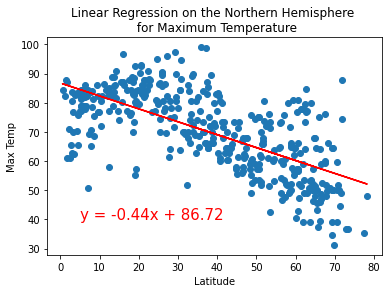

The R-value is: -0.666


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
    y_label='Max Temp',
    text_coordinates=(5,40))



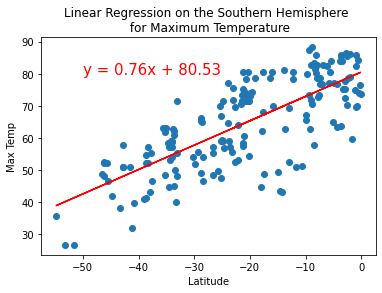

The R-value is: 0.751


In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
    y_label='Max Temp',
    text_coordinates=(-50,80))




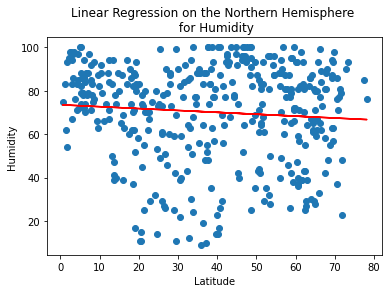

The R-value is: -0.081


In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Humidity', 
    y_label='Humidity',
    text_coordinates=(1,3))




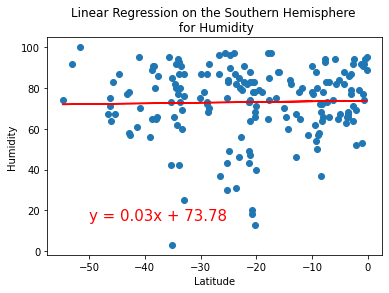

The R-value is: 0.026


In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Humidity', 
    y_label='Humidity',
    text_coordinates=(-50,15))


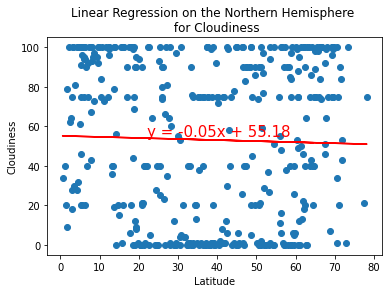

The R-value is: -0.029


In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Cloudiness', 
    y_label='Cloudiness',
    text_coordinates=(22,55))



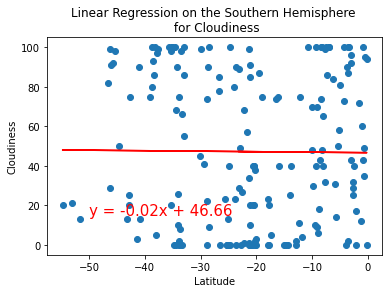

The R-value is: -0.009


In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Cloudiness', 
    y_label='Cloudiness',
    text_coordinates=(-50,15))



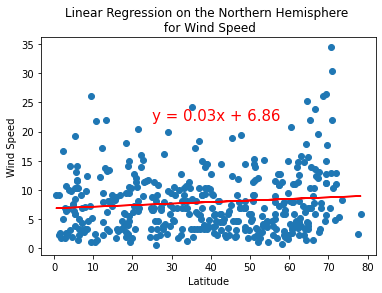

The R-value is: 0.105


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Northern Hemisphere \n for Wind Speed', 
    y_label='Wind Speed',
    text_coordinates=(25,22))

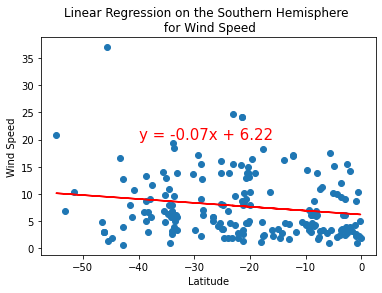

The R-value is: -0.171


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(
    x_values, 
    y_values,
    title='Linear Regression on the Southern Hemisphere \n for Wind Speed', 
    y_label='Wind Speed',
    text_coordinates=(-40,20))

In [41]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Provideniya,RU,2020-06-26 03:03:24,64.38,-173.30,46.40,65,40,17.90
1,1,Kodiak,US,2020-06-26 03:03:24,57.79,-152.41,51.80,81,90,12.75
2,2,Chokurdakh,RU,2020-06-26 03:03:24,70.63,147.92,59.85,37,34,12.91
3,3,Rikitea,PF,2020-06-26 03:03:24,-23.12,-134.97,75.47,85,29,24.70
4,4,Tiksi,RU,2020-06-26 03:03:24,71.69,128.87,49.06,79,84,4.90


In [42]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [43]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=gkey)

In [44]:
# 1. Assign the locations to an array of latitude and longitude pairs.
locations = city_data_df[["Lat","Lng"]]
# 2. Assign the weights variable to some values. Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# 3. Assign the figure variable to the gmaps.figure() attribute.
fig = gmaps.figure()
# 4. Assign the heatmap_layer variable to the heatmap_layer attribute and add in the locations.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)

# 5. Add the heatmap layer.
fig.add_layer(heat_layer)
# 6. Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [47]:
fig.

gmaps.figure.Figure

In [48]:
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)